In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

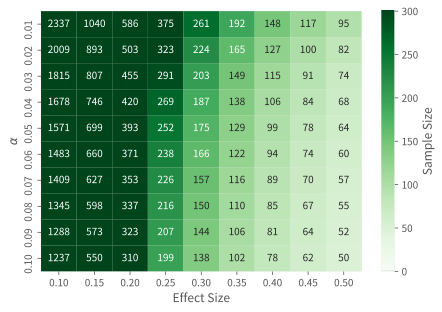

In [3]:
alpha_v = np.arange(0.01, 0.1+0.01, 0.01)
beta = 0.2
effect_size_v = np.arange(0.1, 0.5+0.05, 0.05)

sample_size_m = np.zeros((len(alpha_v), len(effect_size_v)))
for i in range(len(alpha_v)):
    for j in range(len(effect_size_v)):
        sample_size_m[i, j] = sm.stats.tt_ind_solve_power(
            alpha=alpha_v[i],
            power=1-beta,
            effect_size=effect_size_v[j],
            ratio=1,
            nobs1=None,
        )

plt.figure(figsize=(6*1.2, 4*1.2))
sns.heatmap(
    sample_size_m,
    vmax=300, vmin=0, cmap='Greens', annot=True, fmt='.0f',
    yticklabels=[f'{a:.2f}' for a in alpha_v],
    xticklabels=[f'{e:.2f}' for e in effect_size_v],
    cbar_kws=dict(label='Sample Size'),
)
plt.ylabel(r'$ \alpha $')
plt.xlabel('Effect Size')
plt.savefig('figures/06_alpha_effect_size_sample_size.png', dpi=600)

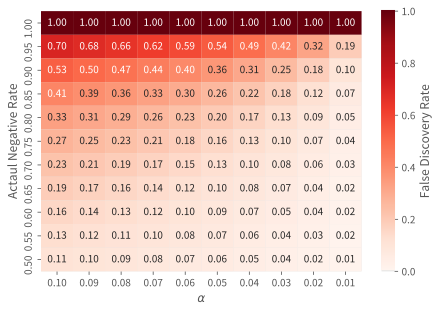

In [4]:
# f: alpha, beta=0.20, anr -> fdr

alpha_v = np.arange(0.1, 0, -0.01)
beta = 0.20
anr_v = np.arange(1, 0.5-0.05, -0.05)

power = 1-beta
apr_v = 1-anr_v

fdr_m = alpha_v*anr_v[:, None] / (alpha_v*anr_v[:, None] + power*apr_v[:, None])
fdr_m

plt.figure(figsize=(6*1.2, 4*1.2))
sns.heatmap(
    fdr_m,
    vmin=0, vmax=1, cmap='Reds', annot=True, fmt='.2f',
    yticklabels=[f'{p:.2f}' for p in anr_v],
    xticklabels=[f'{a:.2f}' for a in alpha_v],
    cbar_kws=dict(label='False Discovery Rate'),
)
plt.ylabel('Actaul Negative Rate')
plt.xlabel(r'$ \alpha $')
plt.savefig('figures/06_anr_alpha_fdr.png', dpi=600)

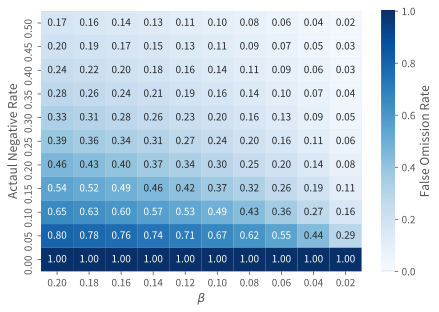

In [5]:
# f: alpha=0.05, beta, anr -> for

alpha = 0.05
beta_v = np.arange(0.2, 0, -0.02)
anr_v = np.arange(0.5, 0-0.05, -0.05)

cl = 1-alpha
apr_v = 1-anr_v

for_m = beta_v*apr_v[:, None] / (cl*anr_v[:, None] + beta_v*apr_v[:, None])
for_m

plt.figure(figsize=(6*1.2, 4*1.2))
sns.heatmap(
    for_m,
    vmin=0, vmax=1, cmap='Blues', annot=True, fmt='.2f',
    yticklabels=[f'{p:.2f}' for p in anr_v],
    xticklabels=[f'{b:.2f}' for b in beta_v],
    cbar_kws=dict(label='False Omission Rate'),
)
plt.ylabel('Actaul Negative Rate')
plt.xlabel(r'$ \beta $')
plt.savefig('figures/06_anr_beta_for.png', dpi=600)

In [6]:
fair_df = sm.datasets.fair.load_pandas().data

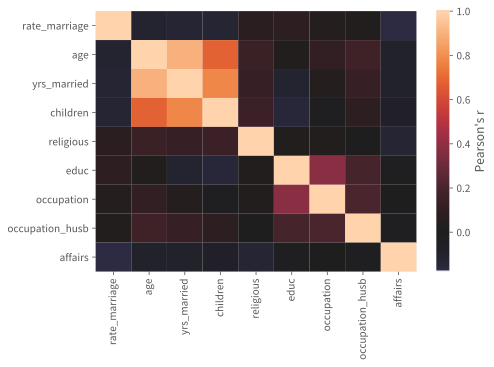

In [7]:
plt.figure(figsize=(6*1.2, 4*1.2))
sns.heatmap(
    np.corrcoef(fair_df.T),
    center=0,
    yticklabels=fair_df.columns,
    xticklabels=fair_df.columns,
    cbar_kws=dict(label="Pearson's r"),
)
plt.savefig('figures/06_fair_r.png', dpi=600)

In [8]:
ols_res = smf.ols('children ~ yrs_married', fair_df).fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               children   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     9437.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:18:48   Log-Likelihood:                -8430.3
No. Observations:                6366   AIC:                         1.686e+04
Df Residuals:                    6364   BIC:                         1.688e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0259      0.018      1.429      0.153      -0.010       0.062
yrs_married     0.1522      0.002     97.142      0.000       0.149       0.155
==============================================================================
Omnibus:                      449.258   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.624
Skew:                           0.559   Prob(JB):                    8.07e-155
Kurtosis:                       4.193   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""